In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [2]:
# importing libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [3]:
image_set = 'C:/Users/Bryan/Documents/Semester 4/CompBio/Codes/Datasets'

In [4]:
SIZE_X = SIZE_Y = 224

datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)

train_set = datagen.flow_from_directory(
    image_set,
    class_mode="categorical",
    target_size=(SIZE_X, SIZE_Y),
    color_mode="rgb",
    batch_size=32,
    shuffle=True, 
    subset='training',
    seed=42
)

validate_set = datagen.flow_from_directory(
    image_set,
    class_mode="categorical",
    target_size=(SIZE_X, SIZE_Y),
    color_mode="rgb",
    batch_size=32,
    shuffle=False,
    subset='validation',
    seed=42
)

Found 878 images belonging to 3 classes.
Found 219 images belonging to 3 classes.


In [5]:
IMAGE_SIZE = [224, 224]

In [6]:
mobilenet = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
# don't train existing weights
for layer in mobilenet.layers:
    layer.trainable = False

In [8]:
flatten = Flatten()(mobilenet.output)
dense = Dense(256, activation='relu')(flatten)
dense = Dense(128, activation='relu')(dense)
prediction = Dense(3, activation='softmax')(dense)

In [9]:
    # creating a model
    model = Model(inputs=mobilenet.input, outputs=prediction)

In [10]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 18,347,843 (69.99 MB)

 Trainable params: 16,089,859 (61.38 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

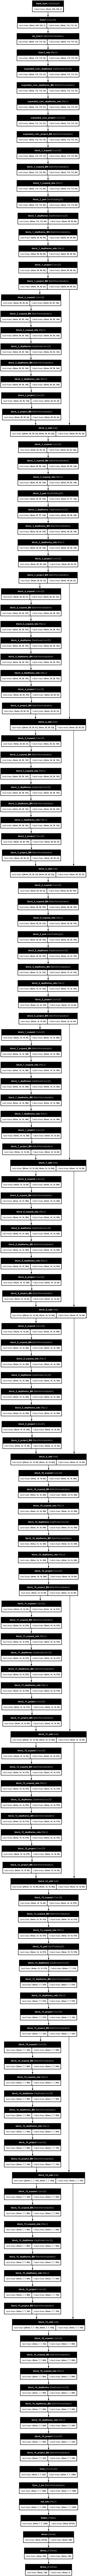

In [11]:
# output dari cell ini di clear karena filenya terlalu besar.

from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [12]:
# COMPILING THE MODEL
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# executing the model
history = model.fit(train_set, validation_data=validate_set, epochs=30, verbose=1)

c:\Users\Bryan\anaconda3\envs\bersihenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 25s 672ms/step - accuracy: 0.5402 - loss: 13.6929 - val_accuracy: 0.7306 - val_loss: 5.2705
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 569ms/step - accuracy: 0.8917 - loss: 0.7420 - val_accuracy: 0.7306 - val_loss: 3.0012
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 561ms/step - accuracy: 0.9400 - loss: 0.2422 - val_accuracy: 0.7123 - val_loss: 4.4078
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 578ms/step - accuracy: 0.9162 - loss: 0.5557 - val_accuracy: 0.8128 - val_loss: 2.6142
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 603ms/step - accuracy: 0.9652 - loss: 0.1868 - val_accuracy: 0.7991 - val_loss: 2.5512
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 594ms/step - accuracy: 0.9806 - loss: 0.0680 - val_accuracy: 0.7717 - val_loss: 3.1887
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 611ms/step - accuracy: 0.9890 - loss: 0.0468 - val_accuracy: 0.7580 - val_loss: 3.1673
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 597ms/step - accuracy: 0.9727 - loss: 0.1201 - val_acc

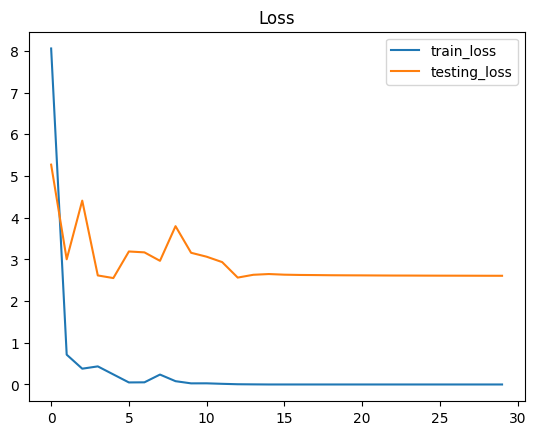

In [14]:
# plotting the loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='testing_loss')
plt.title('Loss')
plt.legend()
plt.show()

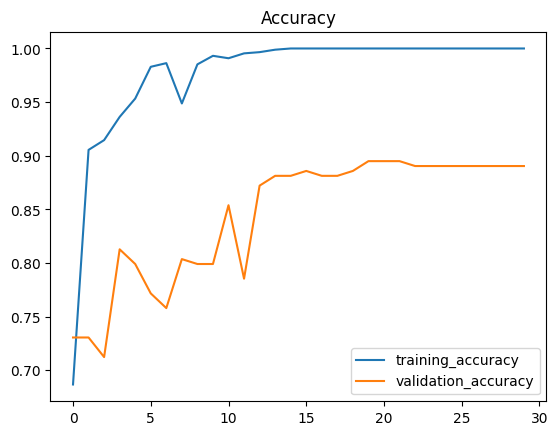

In [15]:
# Both Validation and Training accuracy is shown here
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [16]:
# CHECKING THE CONFUSION MATRIX
Y_pred = model.predict(validate_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
conf_matrix = confusion_matrix(validate_set.classes, y_pred)
print(conf_matrix)
print('Classification Report')
target_names = ['aca', 'n', 'scc']
print(classification_report(validate_set.classes, y_pred, target_names=target_names))

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 553ms/step
Confusion Matrix
[[ 12   0  12]
 [  0 112   0]
 [  3   9  71]]
Classification Report
              precision    recall  f1-score   support

         aca       0.80      0.50      0.62        24
           n       0.93      1.00      0.96       112
         scc       0.86      0.86      0.86        83

    accuracy                           0.89       219
   macro avg       0.86      0.79      0.81       219
weighted avg       0.89      0.89      0.88       219



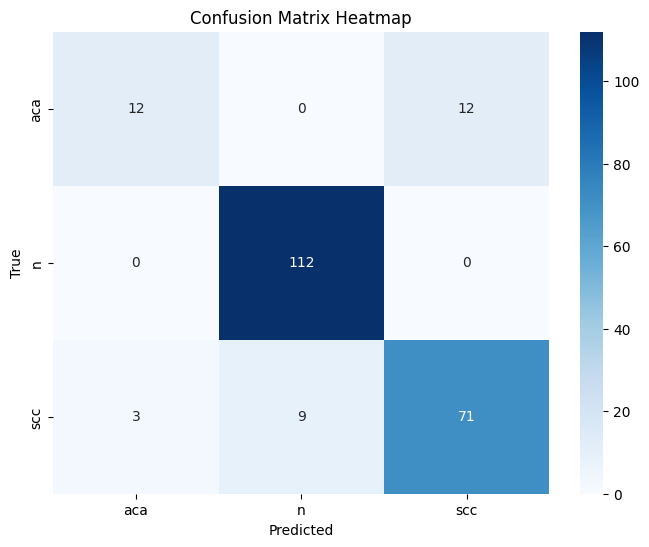

In [17]:
# PLOTTING THE HEATMAP FOR CONFUSION MATRIX
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()